1. Create a jupyter notebook running locally on your computer (you can not use Google Colab as it will not have access to faculty VPN).
2. In the JupyterNoteebok just grab a single measurment (You can use requests module.) Display the measurement in JSON format.

In [ ]:
import requests
import time
import pandas as pd
import matplotlib.pyplot as plt
import time

In [ ]:
res = requests.get('http://tesla.iem.pw.edu.pl:9080/v2/monitor/2')

In [ ]:
res.json()

{'birthdate': '1976',
 'disabled': True,
 'firstname': 'Elżbieta',
 'id': 12,
 'lastname': 'Kochalska',
 'trace': {'id': 13534105062019,
  'name': 'ela',
  'sensors': [{'anomaly': False, 'id': 0, 'name': 'L0', 'value': 1023},
   {'anomaly': False, 'id': 1, 'name': 'L1', 'value': 1023},
   {'anomaly': False, 'id': 2, 'name': 'L2', 'value': 17},
   {'anomaly': False, 'id': 3, 'name': 'R0', 'value': 1023},
   {'anomaly': False, 'id': 4, 'name': 'R1', 'value': 867},
   {'anomaly': False, 'id': 5, 'name': 'R2', 'value': 1023}]}}

3. In JupterNotebook run a script (with a small sleep command) and grab a series of measurments and keep them in a Python list for a period of time equal 5 minutes.

In [ ]:
lst=[]
t = time.time()
period = 30
while(time.time()-t) < period:
    res = requests.get('http://tesla.iem.pw.edu.pl:9080/v2/monitor/2')
    lst.append(res)
    print(f'{time.time()-t}')
    time.sleep(1)
lst = list(map(lambda x: x.json(), lst))

0.057787179946899414
1.124861478805542
2.1872708797454834
3.267038583755493
4.332333564758301
5.387036323547363
6.452773332595825
7.5154383182525635
8.766797542572021
9.831618070602417
10.895087480545044
11.95453429222107
12.996044635772705
15.069973468780518
16.13717746734619
17.217185020446777
18.279435634613037
19.336020946502686
20.40001916885376
21.464016437530518
22.52143621444702
23.582274913787842
24.70922064781189
25.7909255027771
26.836472988128662
27.903450965881348
28.96099352836609
30.021081686019897


In [ ]:
lst[0]

{'birthdate': '1976',
 'disabled': True,
 'firstname': 'Elżbieta',
 'id': 12,
 'lastname': 'Kochalska',
 'trace': {'id': 14000805062019,
  'name': 'ela',
  'sensors': [{'anomaly': False, 'id': 0, 'name': 'L0', 'value': 1023},
   {'anomaly': False, 'id': 1, 'name': 'L1', 'value': 947},
   {'anomaly': False, 'id': 2, 'name': 'L2', 'value': 1023},
   {'anomaly': False, 'id': 3, 'name': 'R0', 'value': 12},
   {'anomaly': False, 'id': 4, 'name': 'R1', 'value': 12},
   {'anomaly': False, 'id': 5, 'name': 'R2', 'value': 11}]}}

4. Convert the measurments from Python list to a Pandas DataFrame with usage of json.loads() function, which converts string representation of JSON to a Python dictionary. Assign valid names to columns and row index.

In [ ]:
data = [ [ row['birthdate'], row['disabled'], row['firstname'], row['id'], row['lastname'], row['trace']['name'], row['trace']['id']
         ] + [ s['anomaly'] for idx, s in enumerate(row['trace']['sensors'])]
        + [ s['value'] for idx, s in enumerate(row['trace']['sensors'])]
        for row in lst ]

df = pd.DataFrame(data, columns = 'birthdate disabled firstname id lastname name trace_id anL1 anL2 anL3 anR1 anR2 anR3 L1 L2 L3 R1 R2 R3'.split())
df.head()

,birthdate,disabled,firstname,id,lastname,name,trace_id,anL1,anL2,anL3,anR1,anR2,anR3,L1,L2,L3,R1,R2,R3
0,1976,True,Elżbieta,12,Kochalska,ela,13540205062019,False,False,False,False,False,False,1023,1023,1023,119,12,12
1,1976,True,Elżbieta,12,Kochalska,ela,13540305062019,False,False,False,False,False,False,1023,1023,13,724,248,1023
2,1976,True,Elżbieta,12,Kochalska,ela,13540505062019,False,False,False,False,False,False,101,205,13,1023,1023,1023
3,1976,True,Elżbieta,12,Kochalska,ela,13540605062019,False,False,False,False,False,False,458,300,1023,1023,1023,639
4,1976,True,Elżbieta,12,Kochalska,ela,13540705062019,False,False,False,False,False,False,1023,934,1023,1023,781,16


5. Plot using matplotlib/seaborn or plotly, in a single figure, six traces separately for all foots.

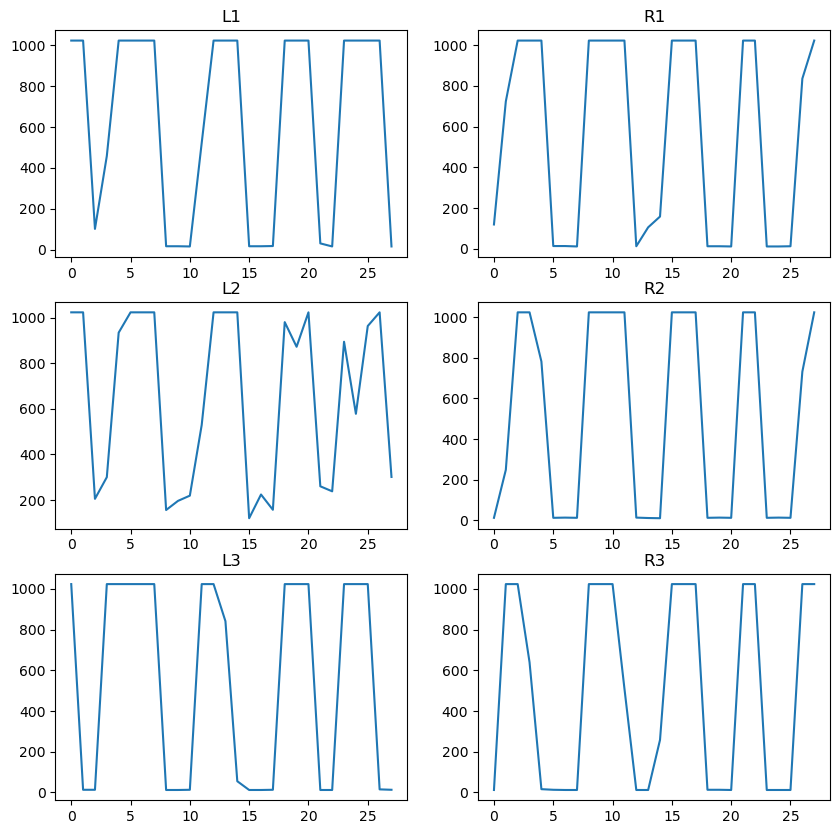

In [ ]:
fig, ax = plt.subplots(3,2,figsize=(10,10), dpi=100)

for i, s in enumerate('L1 R1 L2 R2 L3 R3'.split()):
    ax[i // 2, i % 2].plot(df[s], label=s)
    ax[i // 2, i % 2].set_title(s)


6. Repeat the measurmenets for all cases and plot the results on the JupterNotebook for all patients.

0.04431581497192383
1.0934267044067383
2.155230760574341
3.227083206176758
4.284161567687988
5.346613883972168


,birthdate,disabled,firstname,id,lastname,name,trace_id,anL1,anL2,anL3,anR1,anR2,anR3,L1,L2,L3,R1,R2,R3
0,1982,False,Janek,12,Grzegorczyk,bach,3005701012010,False,False,False,False,False,False,834,357,1023,1023,209,1023
1,1982,False,Janek,12,Grzegorczyk,bach,3005801012010,False,False,False,False,False,False,956,630,1023,1023,166,1023
2,1982,False,Janek,12,Grzegorczyk,bach,3010001012010,False,False,False,False,False,False,1023,756,1023,1023,44,1023
3,1982,False,Janek,12,Grzegorczyk,bach,3010101012010,False,False,False,False,False,False,26,26,230,1023,241,1023
4,1982,False,Janek,12,Grzegorczyk,bach,3010301012010,False,False,False,False,False,False,974,709,1023,1023,38,1023


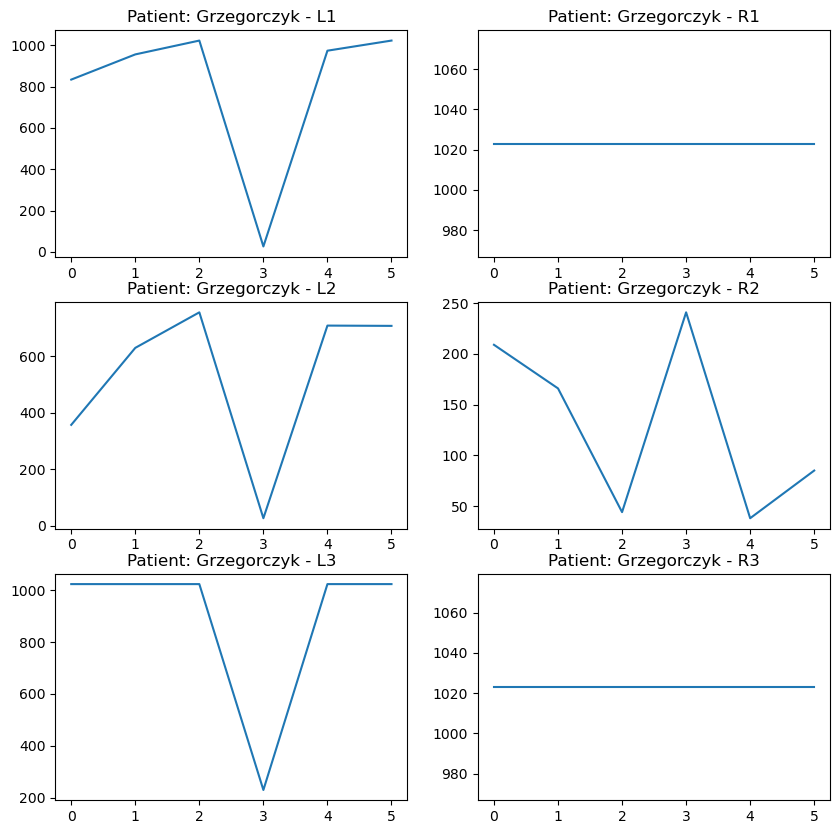

0.04567742347717285
1.1250677108764648
2.1825854778289795
3.231933116912842
4.292980194091797
5.350425958633423


,birthdate,disabled,firstname,id,lastname,name,trace_id,anL1,anL2,anL3,anR1,anR2,anR3,L1,L2,L3,R1,R2,R3
0,1976,True,Elżbieta,12,Kochalska,ela,13510205062019,False,False,False,False,False,False,1023,1023,1023,13,13,13
1,1976,True,Elżbieta,12,Kochalska,ela,13510405062019,False,False,False,False,False,False,1023,1023,17,1023,699,1023
2,1976,True,Elżbieta,12,Kochalska,ela,13510605062019,False,False,False,False,False,False,432,345,14,1023,1023,1023
3,1976,True,Elżbieta,12,Kochalska,ela,13510705062019,False,False,False,False,False,False,272,371,13,1023,1023,716
4,1976,True,Elżbieta,12,Kochalska,ela,13510905062019,False,False,False,False,False,False,1023,1023,1023,169,13,13


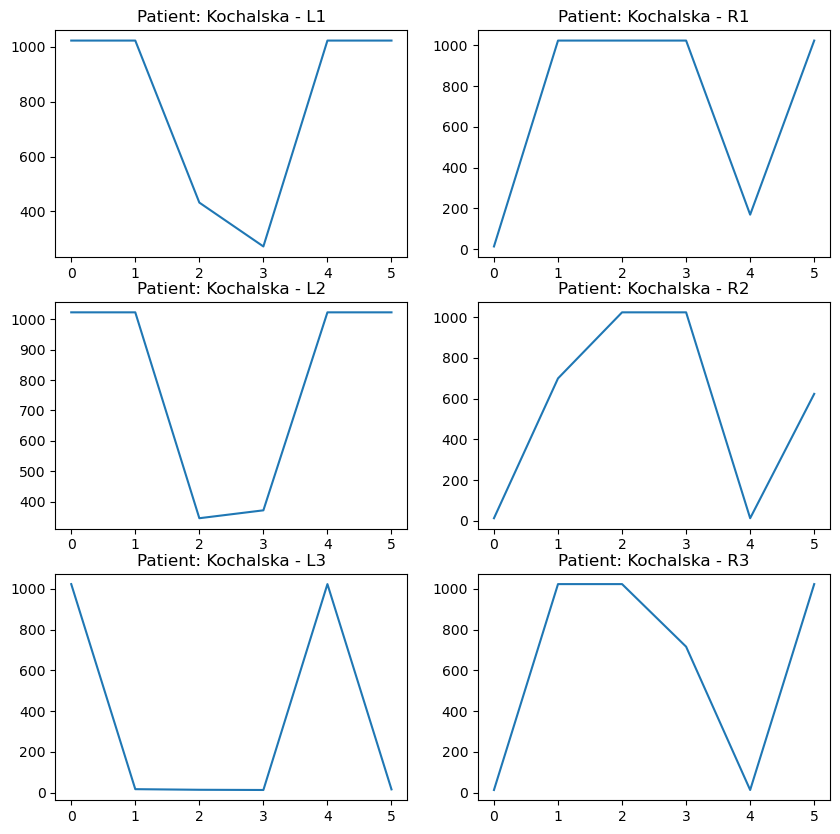

0.04692816734313965
1.1130945682525635
2.172184705734253
3.2289531230926514
4.291766166687012
5.355785369873047


,birthdate,disabled,firstname,id,lastname,name,trace_id,anL1,anL2,anL3,anR1,anR2,anR3,L1,L2,L3,R1,R2,R3
0,1991,False,Albert,12,Lisowski,alek,12033213082019,False,False,False,False,False,False,7,8,7,7,9,9
1,1991,False,Albert,12,Lisowski,alek,12033313082019,False,False,False,False,False,False,6,7,7,8,7,9
2,1991,False,Albert,12,Lisowski,alek,12033513082019,False,False,False,False,False,False,6,6,6,8,6,9
3,1991,False,Albert,12,Lisowski,alek,12033613082019,False,False,False,False,False,False,8,7,6,8,6,8
4,1991,False,Albert,12,Lisowski,alek,12033813082019,False,False,False,False,False,False,8,8,5,8,6,7


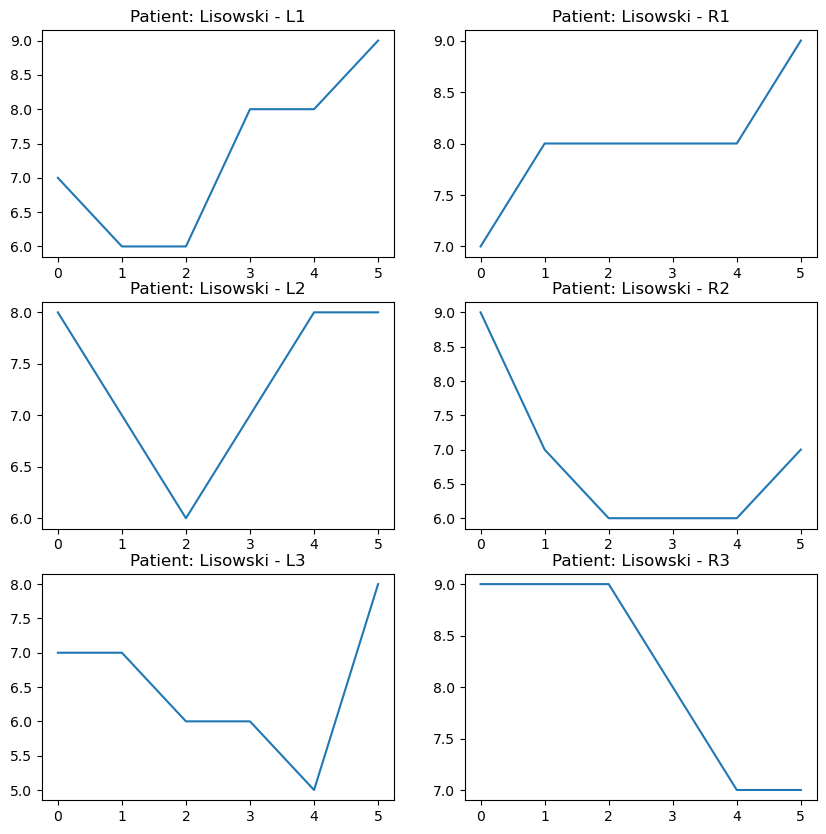

0.04434347152709961
1.1021757125854492
2.1603691577911377
3.249756336212158
4.3112406730651855
5.364122152328491


,birthdate,disabled,firstname,id,lastname,name,trace_id,anL1,anL2,anL3,anR1,anR2,anR3,L1,L2,L3,R1,R2,R3
0,1998,True,Ewelina,12,Nosowska,ewelinka,16552524082019,True,True,True,True,True,True,1023,1023,1023,422,33,116
1,1998,True,Ewelina,12,Nosowska,ewelinka,16552624082019,True,True,True,True,True,True,510,511,532,1023,493,1023
2,1998,True,Ewelina,12,Nosowska,ewelinka,16552824082019,True,True,True,True,True,True,850,801,1023,1023,1023,845
3,1998,True,Ewelina,12,Nosowska,ewelinka,16552924082019,True,True,True,True,True,True,1023,1023,1023,312,46,389
4,1998,True,Ewelina,12,Nosowska,ewelinka,16553124082019,True,True,True,True,True,True,1023,1023,1023,267,33,320


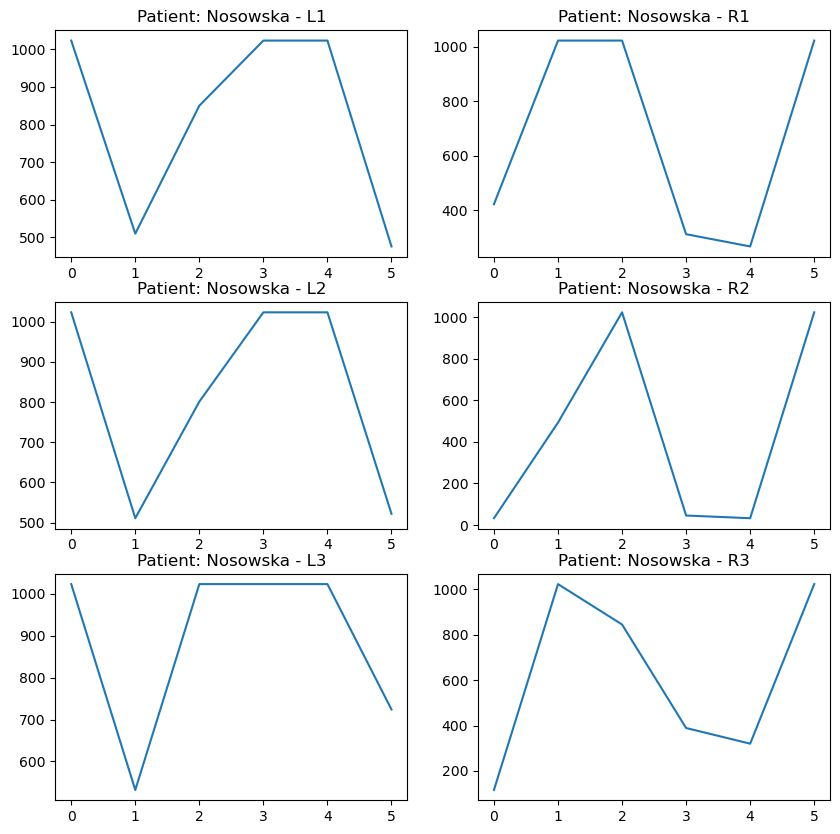

0.0562283992767334
1.112471103668213
2.1714980602264404
3.226133108139038
4.2915191650390625
5.356875419616699


,birthdate,disabled,firstname,id,lastname,name,trace_id,anL1,anL2,anL3,anR1,anR2,anR3,L1,L2,L3,R1,R2,R3
0,1985,False,Piotr,12,Fokalski,piotrek - w czasie spaceru z psem,3412922012010,False,False,False,False,False,False,679,70,1023,1023,493,71
1,1985,False,Piotr,12,Fokalski,piotrek - w czasie spaceru z psem,3413022012010,False,False,False,False,False,False,957,64,65,1023,999,65
2,1985,False,Piotr,12,Fokalski,piotrek - w czasie spaceru z psem,3413222012010,False,False,False,False,False,False,1023,1023,66,761,85,66
3,1985,False,Piotr,12,Fokalski,piotrek - w czasie spaceru z psem,3413322012010,False,False,False,False,False,False,938,67,67,1023,1023,67
4,1985,False,Piotr,12,Fokalski,piotrek - w czasie spaceru z psem,3413522012010,False,False,False,False,False,False,905,59,59,1023,753,64


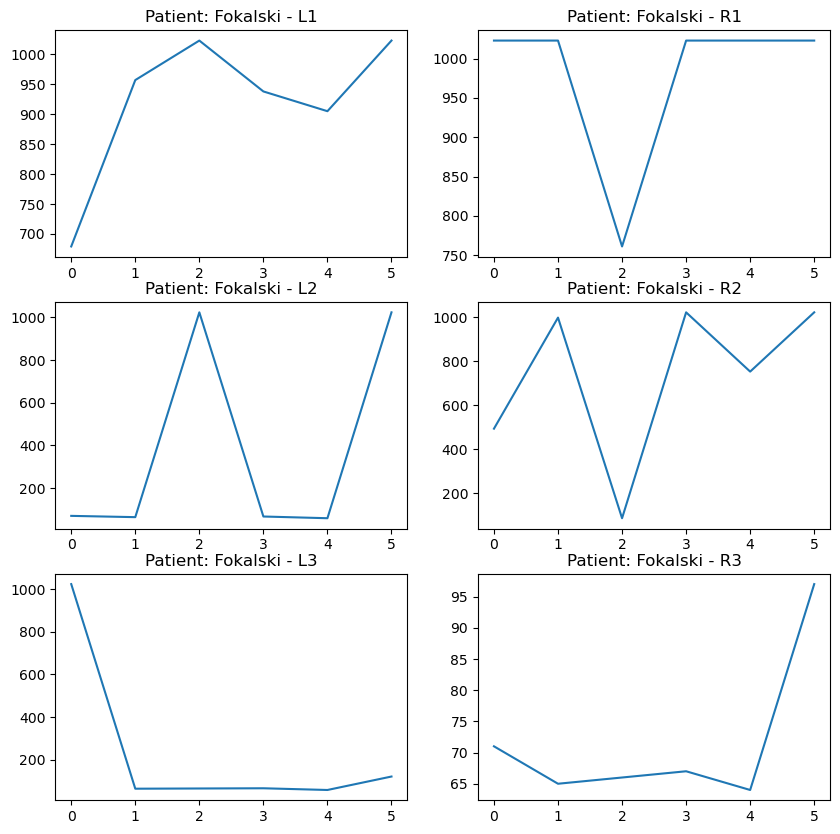

0.07240796089172363
1.1232857704162598
2.1807024478912354
3.24004864692688
4.311065435409546
5.454564571380615


,birthdate,disabled,firstname,id,lastname,name,trace_id,anL1,anL2,anL3,anR1,anR2,anR3,L1,L2,L3,R1,R2,R3
0,1981,False,Bartosz,12,Moskalski,bartek gdy poszedł po kanapkę,4432530012010,False,False,False,False,False,False,872,38,38,1023,787,38
1,1981,False,Bartosz,12,Moskalski,bartek gdy poszedł po kanapkę,4432730012010,False,False,False,False,False,False,810,178,1023,1023,669,50
2,1981,False,Bartosz,12,Moskalski,bartek gdy poszedł po kanapkę,4432930012010,False,False,False,False,False,False,1023,1023,42,44,44,1023
3,1981,False,Bartosz,12,Moskalski,bartek gdy poszedł po kanapkę,4433030012010,False,False,False,False,False,False,777,39,36,1023,651,36
4,1981,False,Bartosz,12,Moskalski,bartek gdy poszedł po kanapkę,4433130012010,False,False,False,False,False,False,731,117,1023,1023,707,49


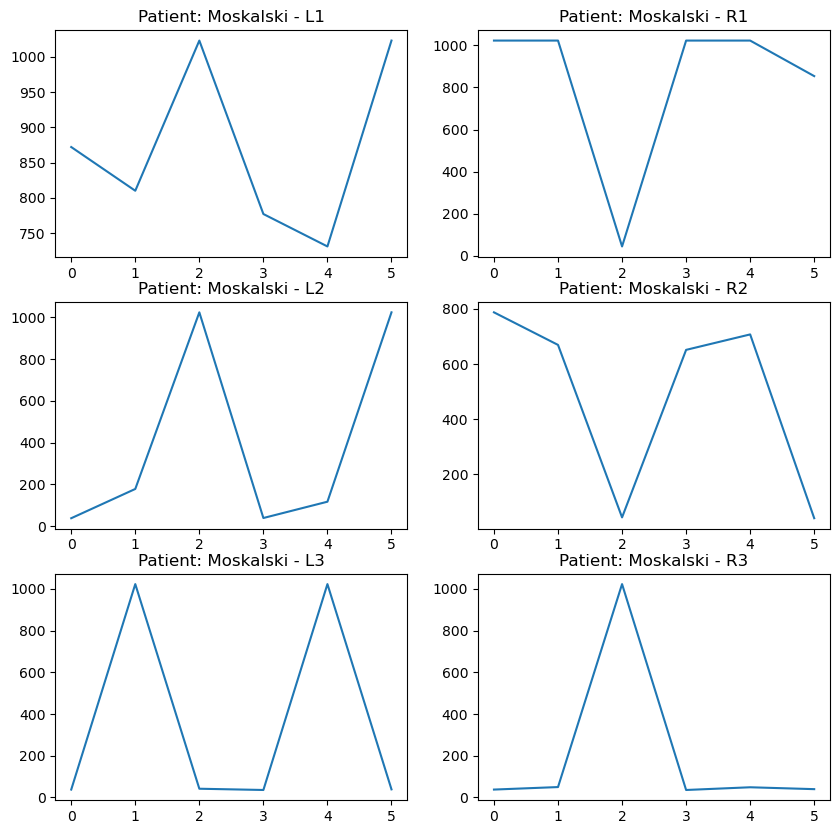

Done


In [ ]:
def get_data(patient_id, period):
    lst=[]
    t = time.time()
    while(time.time()-t) < period:
        res = requests.get(f'http://tesla.iem.pw.edu.pl:9080/v2/monitor/{patient_id}')
        lst.append(res)
        print(f'{time.time()-t}')
        time.sleep(1)

    return list(map(lambda x: x.json(), lst))

def as_df(lst):
    data = [ [ row['birthdate'], row['disabled'], row['firstname'], row['id'], row['lastname'], row['trace']['name'], row['trace']['id']
         ] + [ s['anomaly'] for idx, s in enumerate(row['trace']['sensors'])]
        + [ s['value'] for idx, s in enumerate(row['trace']['sensors'])]
        for row in lst ]
    df = pd.DataFrame(data, columns = 'birthdate disabled firstname id lastname name trace_id anL1 anL2 anL3 anR1 anR2 anR3 L1 L2 L3 R1 R2 R3'.split())

    return df

def plot_data(df):
    fig, ax = plt.subplots(3,2,figsize=(10,10), dpi=100)

    for i, s in enumerate('L1 R1 L2 R2 L3 R3'.split()):
        ax[i // 2, i % 2].plot(df[s], label=s)
        ax[i // 2, i % 2].set_title(f"Patient: {df.iloc[0,:]['lastname']} - {s}")
    plt.show()

for patient_id in '1 2 3 4 5 6'.split():
    lst = get_data(patient_id, 6)
    df = as_df(lst)
    display(df.head())
    plot_data(df)

print('Done')

7. Highlight parts of any of the trace where you will notice the 'anomaly', which is a parameter of single measurements.

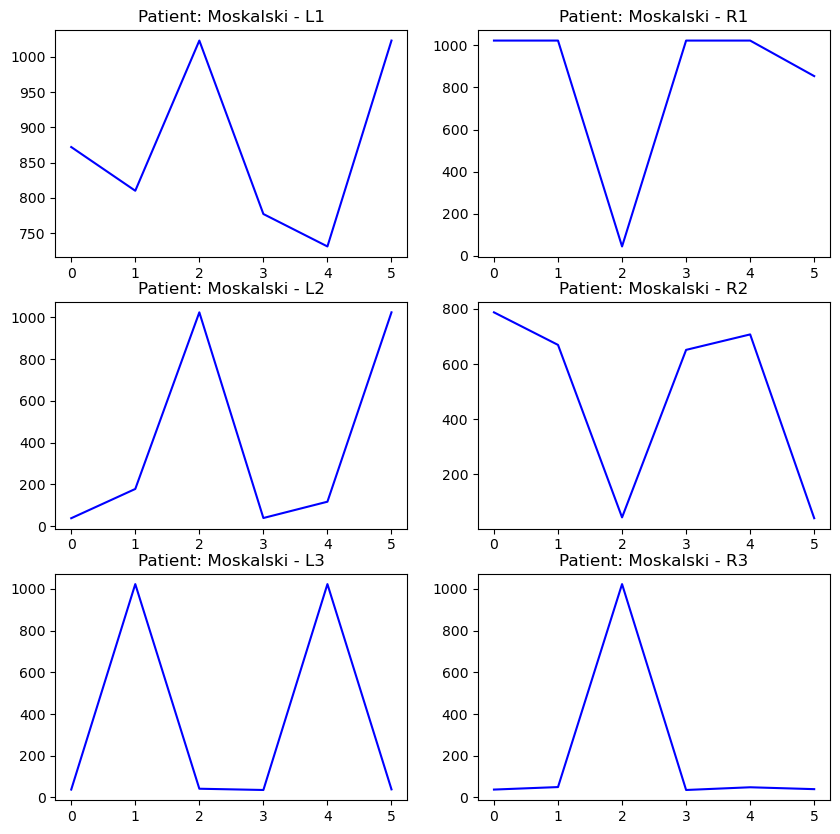

In [ ]:
def plot_data(df):
    fig, ax = plt.subplots(3,2,figsize=(10,10), dpi=100)

    for i, s in enumerate('L1 R1 L2 R2 L3 R3'.split()):
        ax[i // 2, i % 2].plot(df.index, df[s], label=s, color='blue')
        ax[i // 2, i % 2].plot(df.index[df['an'+s] == True],
                              df['L1'][df['an'+s] == True], label = s, color = 'red', lw=5, ls='--')

        ax[i // 2, i % 2].set_title(f"Patient: {df.iloc[0, :]['lastname']} - {s}")
    plt.show()

plot_data(df)

0.055632829666137695
1.1318302154541016
2.196627616882324
3.288653612136841
4.340968608856201
5.422863245010376
6.535992622375488
7.602895975112915
8.661181926727295
9.718672752380371


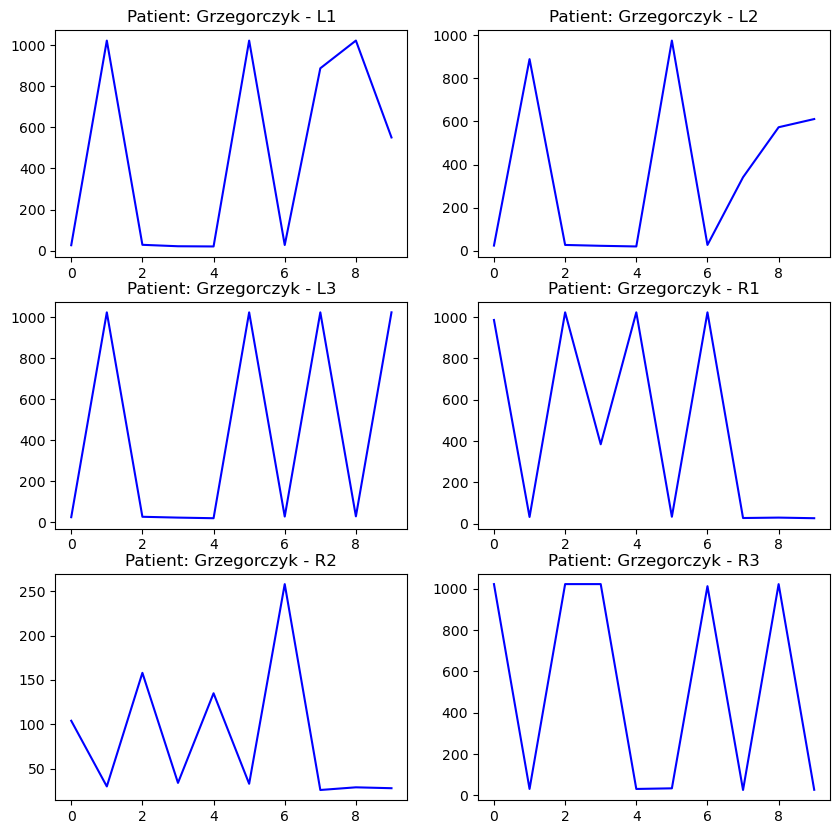

0.058042049407958984
1.127720594406128
2.1881978511810303
3.254204511642456
4.334871530532837
5.471387147903442
6.605995416641235
7.662335634231567
8.735514402389526
9.783519983291626


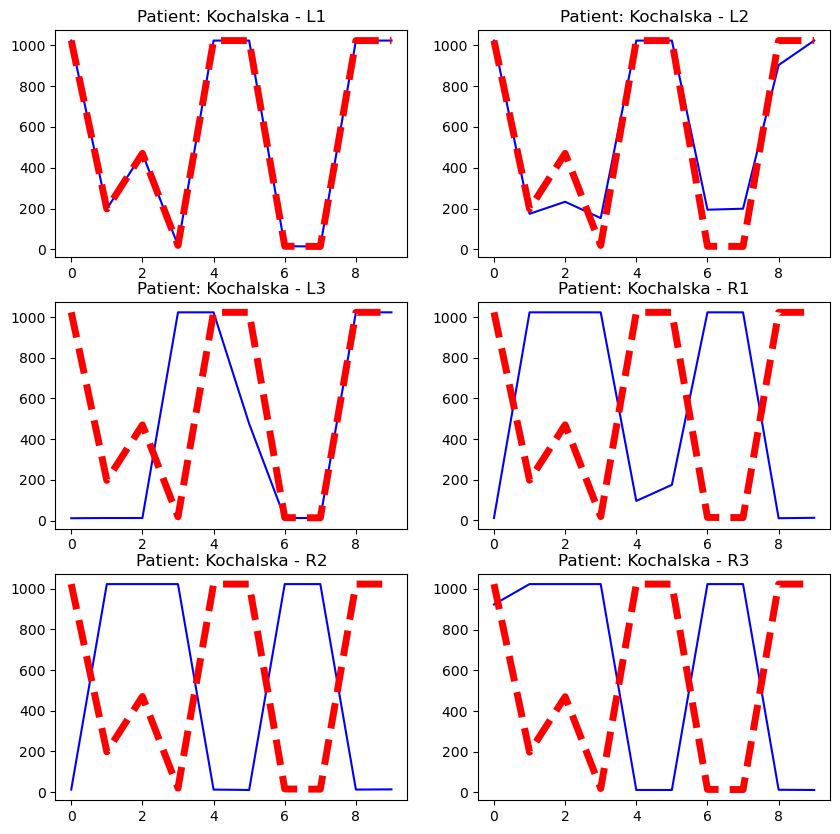

0.05471229553222656
1.1069717407226562
2.1575372219085693
3.220172882080078
4.280981540679932
5.332967281341553
6.383821725845337
7.443151235580444
8.501518487930298
9.567686557769775


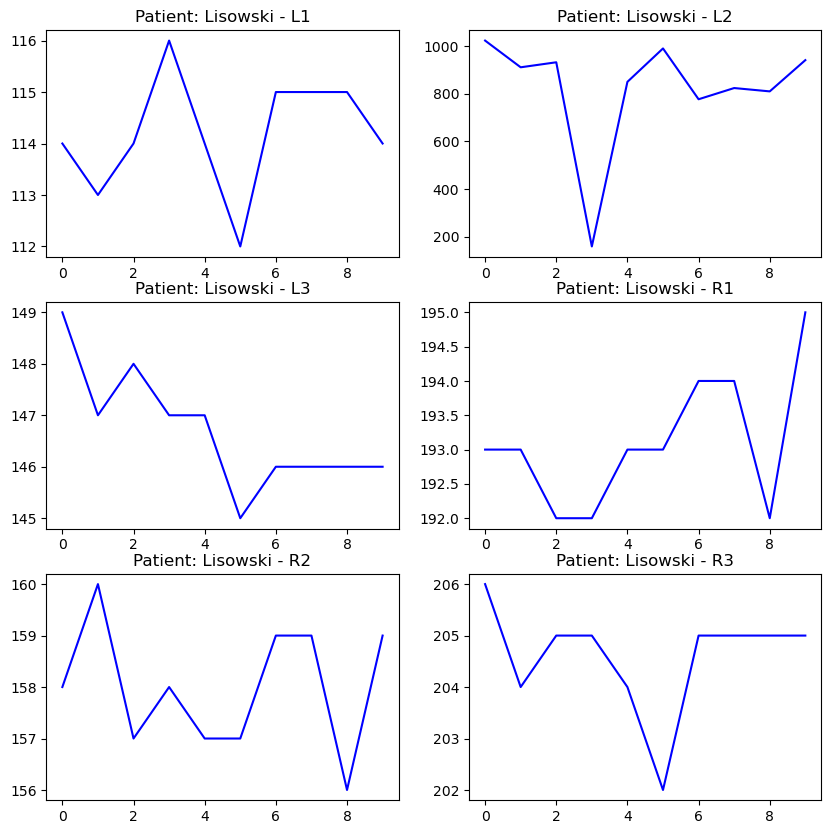

0.1012113094329834
1.1594655513763428
2.203368902206421
3.2604727745056152
4.318246364593506
5.374007225036621
6.451254367828369
7.5137693881988525
8.566957712173462
9.636244535446167


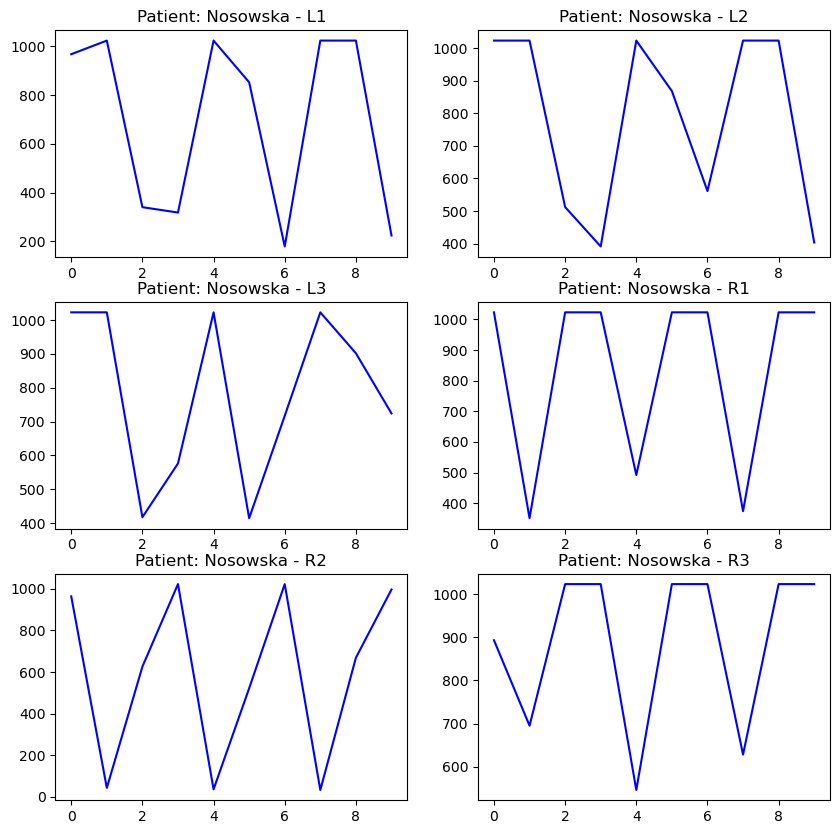

0.04626870155334473
1.1064515113830566
2.161607265472412
3.2228798866271973
4.292151927947998
5.349515914916992
6.405626535415649
7.468430519104004
8.516892671585083
9.601863622665405


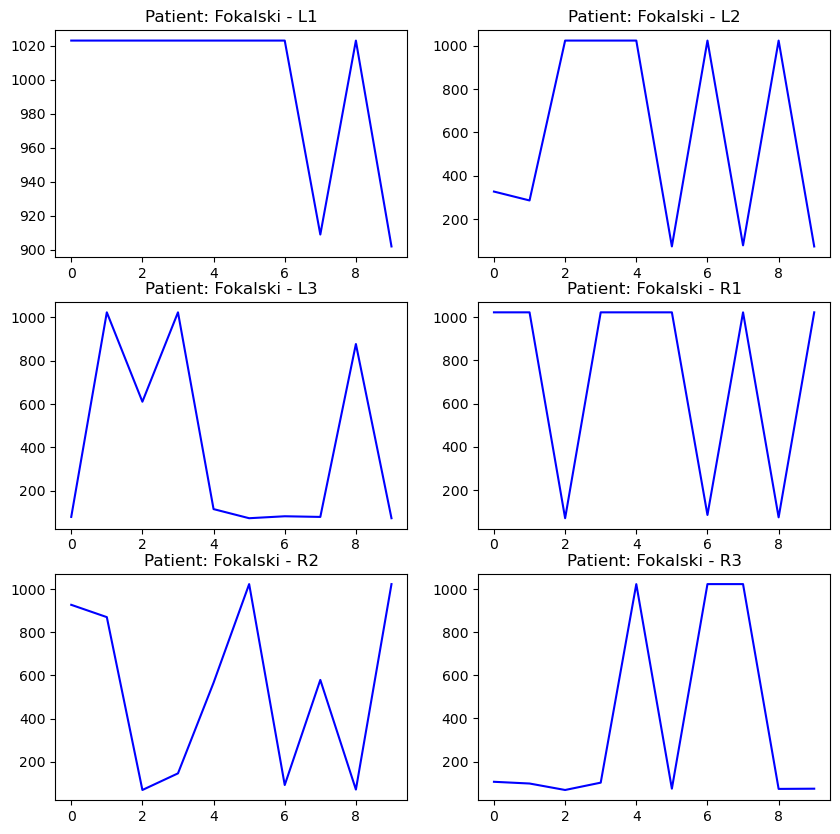

0.044651031494140625
1.1104769706726074
2.164613723754883
3.2339601516723633
4.2948384284973145
5.343273878097534
6.407534599304199
7.453397989273071
8.53044319152832
9.588637590408325


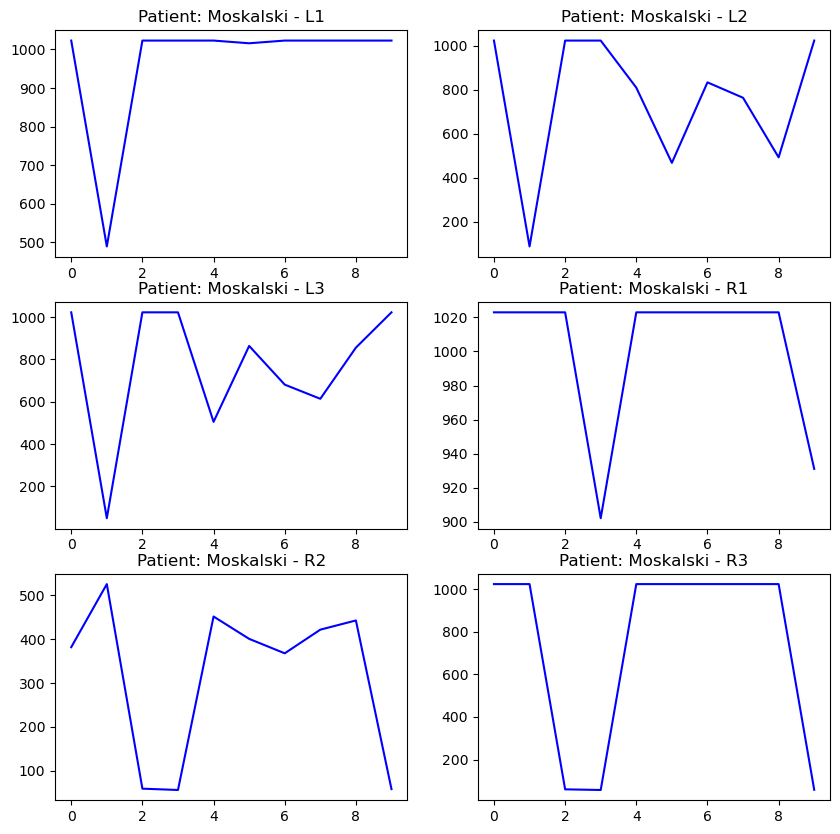

Done


In [ ]:
def get_data(patient_id, period):
    lst=[]
    t = time.time()
    while(time.time()-t) < period:
        res = requests.get(f'http://tesla.iem.pw.edu.pl:9080/v2/monitor/{patient_id}')
        lst.append(res)
        print(f'{time.time()-t}')
        time.sleep(1)

    return list(map(lambda x: x.json(), lst))

def as_df(lst):
    data = [ [ row['birthdate'], row['disabled'], row['firstname'], row['id'], row['lastname'], row['trace']['name'], row['trace']['id']
         ] + [ s['anomaly'] for idx, s in enumerate(row['trace']['sensors'])]
        + [ s['value'] for idx, s in enumerate(row['trace']['sensors'])]
        for row in lst ]
    df = pd.DataFrame(data, columns = 'birthdate disabled firstname id lastname name trace_id anL1 anL2 anL3 anR1 anR2 anR3 L1 L2 L3 R1 R2 R3'.split())

    return df

def plot_data(df):
    fig, ax = plt.subplots(3,2,figsize=(10,10), dpi=100)

    for i, s in enumerate('L1 L2 L3 R1 R2 R3'.split()):
        ax[i // 2, i % 2].plot(df.index, df[s], label=s, color='blue')
        ax[i // 2, i % 2].plot(df.index[df['an'+s] == True],
                              df['L1'][df['an'+s] == True], label = s, color = 'red', lw=5, ls='--')

        ax[i // 2, i % 2].set_title(f"Patient: {df.iloc[0, :]['lastname']} - {s}")
    plt.show()


for patient_id in '1 2 3 4 5 6'.split():
    lst = get_data(patient_id, 10)
    df = as_df(lst)

    if patient_id == '1':
        df['L2'].iloc[3:-3] == True

    plot_data(df)

print('Done')

8. Answer the question: 'How often the results change?'

Every 600 ms

9. Can you observe any patterns? How long are the patterns.

When person walks we can see only one foot sensor is pressed. Time of single step is about 2 seconds